<a href="https://colab.research.google.com/github/RegiRezende/Curso_Python_FEA/blob/main/REDE_NEURAL_dozero_avancado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd
import pickle


In [ ]:
plt.rcParams['figure.figsize']=(10,8)
plt.style.use('dark_background')




1.   Dataset




In [ ]:
x, y = datasets.make_moons(n_samples=500, noise=0.05)

visualizando os valores dos dados

In [ ]:
print (f'{x.shape = }, {y.shape =}')

x.shape = (500, 2), y.shape =(500,)


In [ ]:
pd.DataFrame({'x_1': x[:,0], 'x_2': x[:,1], 'y': y})

,x_1,x_2,y
0,0.709830,-0.501719,1
1,1.996753,0.178510,1
2,1.701868,-0.275974,1
3,-0.995302,0.193433,0
4,1.193102,-0.500193,1
...,...,...,...
495,-0.976416,0.062191,0
496,1.704281,-0.159129,1
497,-1.041607,-0.027748,0
498,0.054734,1.016572,0


Tendo duas entradas x1 e x2, tentar prever se este valor pertence à classe y=0 ou y=1

In [ ]:
unique = np.unique(y, return_counts= True)
for label, qt_label in zip(unique[0], unique[1]):
  print(f'Label:{label}\t Counts {qt_label}')

Label:0	 Counts 250
Label:1	 Counts 250


os valores y ou sao 0 ou sao 1

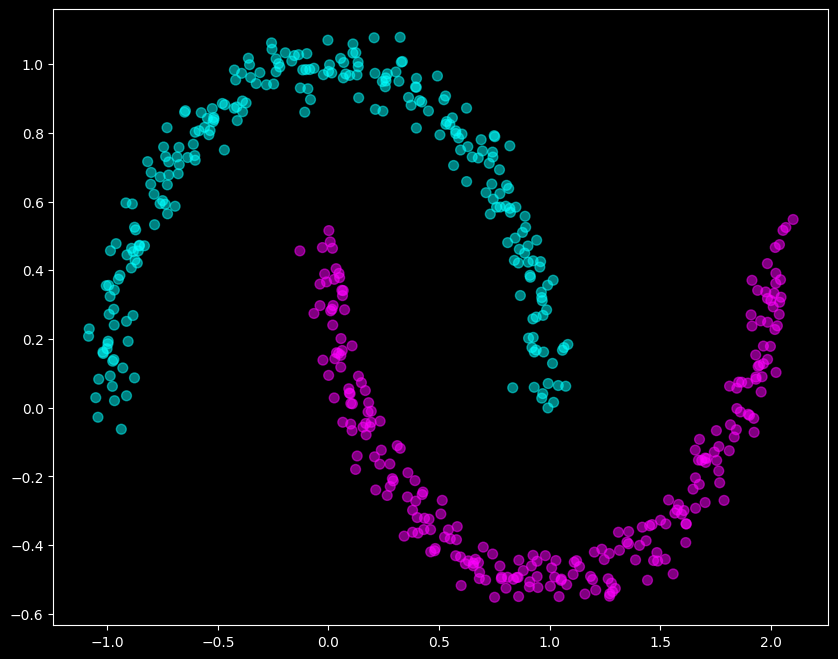

In [ ]:
plt.scatter(x[:,0], x[:,1], c = y, s =50, alpha = 0.5, cmap ='cool')

# Modelo

- Inicializaçao de pesos e bias
- Construir uma função para o feedforward
- Cálculo da perda
- Backpropagation
- Fit
usando classes

In [ ]:
class NnModel:
   def __init__(self, x: np.ndarray, y: np.ndarray, hidden_neurons: int = 10, output_neurons: int = 2):
    np.random.seed(8)
    self.x = x        # para o treinamento
    self.y = y
    self.hidden_neurons = hidden_neurons
    self.output_neurons = output_neurons
    self.input_neurons = self.x.shape[1]

    # inicializa os pesos e bias
    # Xavier Inicialization -> variancia dos pesos igual em todas as camadas
    self.W1 = np.random.randn(self.input_neurons, self.hidden_neurons) / np.sqrt(self.input_neurons)
    self.B1 = np.zeros((1, self.hidden_neurons))
    self.W2 = np.random.randn(self.hidden_neurons, self.output_neurons) / np.sqrt(self.hidden_neurons)
    self.B2 = np.zeros((1, self.output_neurons))
    self.model_dict = {'W1': self.W1, 'B1': self.B1, 'W2': self.W2, 'B2': self.B2}
    self.z1 = 0
    self.f1 = 0

   def forward(self, x: np.ndarray):    # Cálculo da previsão da rede, funções de ativação, passa o x pois isto é após a rede estar treinada
     # Equação da reta (da 1a parte)
     self.z1 = x.dot(self.W1) + self.B1

     # função de ativação
     self.f1 = np.tanh(self.z1)

     # Equação da reta 2 (da 2a parte)
     z2 = self.f1.dot(self.W2) + self.B2


     # SOFTMAX , transforma as saídas e deixa com valores entre 0 e 1 (+- como a probabilidade de cada classe)
     exp_values = np.exp(z2)
     softmax = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
     return softmax


   def loss(self, softmax): # irá depois comparar a previsão da softmax com o y
     # Cross entropy, calcula a perda só da classe correta

     predictions = np.zeros(self.y.shape[0]) # criando um vetor cheio de zeros que tem a mesma dimensao do y [500 linhas, 1 coluna]
     for i, correct_index in enumerate(self.y):
       predicted = softmax[i][correct_index]
       predictions[i] = predicted

     log_prob = -np.log(predicted)
     return log_prob/self.y.shape[0]   # media


   def backpropagation(self, softmax: np.ndarray, learning_rate: float) -> None:  # atualiza os pesos mas nao retorna nada
     delta2 = np.copy(softmax)
     delta2[range(self.x.shape[0]), self.y] -= 1 #previsao dos valores corretos - 1
     dW2 = (self.f1.T).dot(delta2)
     dB2 = np.sum(delta2, axis = 0, keepdims = True)
     delta1 = delta2.dot(self.W2.T)*(1 - np.power(self.f1, 2))
     dW1 = (self.x.T).dot(delta1)
     dB1 =np.sum(delta1, axis = 0, keepdims = True)

     # atualização dos pesos e Bias
     self.W1 += -learning_rate * dW1     # W1 = W1 -learning_rate*dW1
     self.W2 += -learning_rate * dW2
     self.B1 += -learning_rate * dB1
     self.B2 += -learning_rate * dB2


   def fit(self, epochs: int, lr: float):  # ajuste dos dados
     for epoch in range(epochs):

       outputs = self.forward(self.x)
       loss = self.loss(outputs)
       self.backpropagation(outputs, lr)  # até aqui é suficiente para o treinamento da rede

       # acurácia = quantos acertos houveram baseado no total de observações
       prediction = np.argmax(outputs, axis = 1)
       correct = (prediction == self.y).sum()
       accuracy = correct /self.y.shape[0]

       if int((epoch + 1) % (epochs/10)) == 0:
         print(f'Epoch: [{epoch +1}] / {epochs}  Accuracy: {accuracy:.3f}  Loss: {loss.item():.6f}' )

     return  prediction




In [ ]:
hidden_neurons = 10
output_neurons = 2
learning_rate = 0.01
epochs = 30

In [ ]:
model = NnModel(x, y, hidden_neurons=hidden_neurons, output_neurons=output_neurons)     # criando o modelo
result = model.fit(epochs, learning_rate)                                               #treino

Epoch: [3] / 30  Accuracy: 0.500  Loss: 0.000000
Epoch: [6] / 30  Accuracy: 0.734  Loss: 0.000011
Epoch: [9] / 30  Accuracy: 0.876  Loss: 0.000006
Epoch: [12] / 30  Accuracy: 0.728  Loss: 0.000000
Epoch: [15] / 30  Accuracy: 0.888  Loss: 0.000000
Epoch: [18] / 30  Accuracy: 0.726  Loss: 0.000000
Epoch: [21] / 30  Accuracy: 0.892  Loss: 0.000000
Epoch: [24] / 30  Accuracy: 0.832  Loss: 0.000000
Epoch: [27] / 30  Accuracy: 0.900  Loss: 0.000000
Epoch: [30] / 30  Accuracy: 0.962  Loss: 0.000000


# Testes e Resultados

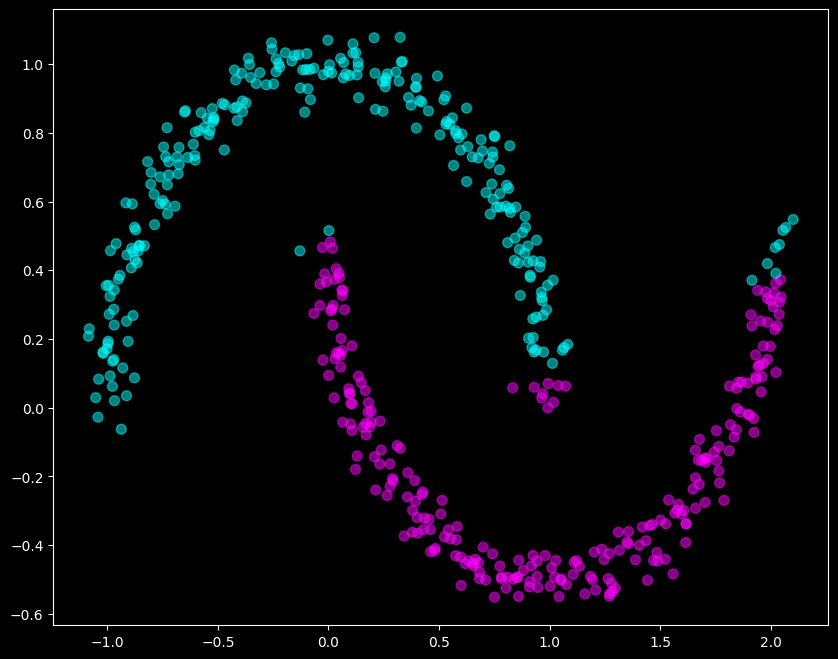

In [ ]:
plt.scatter(x[:,0], x[:,1], c = result, s =50, alpha = 0.5, cmap ='cool')

# Cluster Dataset

In [ ]:
x_, y_ = datasets.make_blobs(n_samples = 400, n_features = 2, centers = 4, random_state = 10, cluster_std =0.9, shuffle = True)   # Cluster std é o desvio padrão dos pontos dentro do cluster, quanto estao espalhados

In [ ]:
x_.shape, y_.shape       # 400 linhas por 2 colunas no x e 400 linhas do y

((400, 2), (400,))

In [ ]:
np.unique(y_, return_counts = True)    # retorna quais são as classes 4 classes 0, 1, 2, 3 (com 100 observaçoes de cada uma), definidas acima como centers. O que queremos prever: Dado um ponto, à qual classe ele pertence?

(array([0, 1, 2, 3]), array([100, 100, 100, 100]))

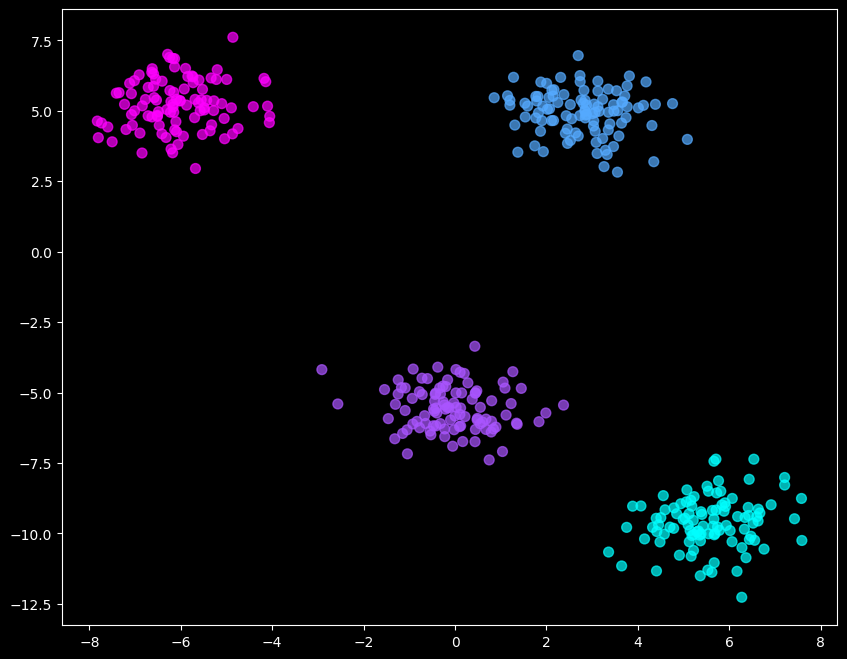

In [ ]:
plt.scatter(x_[:,0], x_[:,1], c = y_, s =50, alpha = 0.7, cmap ='cool')

In [ ]:
hidden_neurons =50
output_neurons = 4
learning_rate = 0.0015
epochs = 1000

In [ ]:
model = NnModel(x_, y_, hidden_neurons=hidden_neurons, output_neurons=output_neurons)     # criando o modelo
result = model.fit(epochs, learning_rate)                                               #treino

Epoch: [100] / 1000  Accuracy: 0.998  Loss: 0.000001
Epoch: [200] / 1000  Accuracy: 0.998  Loss: 0.000000
Epoch: [300] / 1000  Accuracy: 0.998  Loss: 0.000000
Epoch: [400] / 1000  Accuracy: 0.998  Loss: 0.000000
Epoch: [500] / 1000  Accuracy: 0.998  Loss: 0.000000
Epoch: [600] / 1000  Accuracy: 0.998  Loss: 0.000000
Epoch: [700] / 1000  Accuracy: 1.000  Loss: 0.000000
Epoch: [800] / 1000  Accuracy: 1.000  Loss: 0.000000
Epoch: [900] / 1000  Accuracy: 1.000  Loss: 0.000000
Epoch: [1000] / 1000  Accuracy: 1.000  Loss: 0.000000


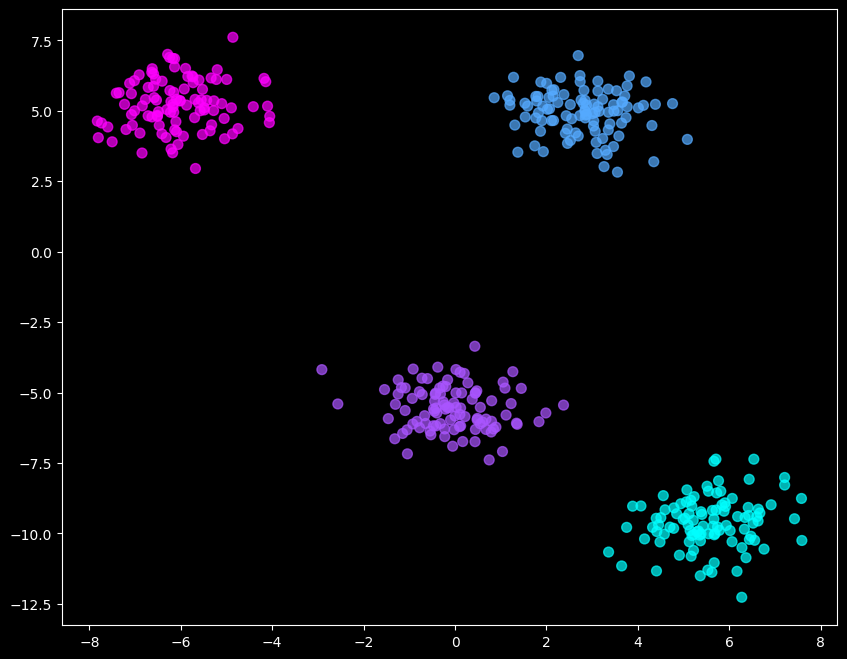

In [ ]:
plt.scatter(x_[:,0], x_[:,1], c = result , s =50, alpha = 0.7, cmap ='cool')   # com esta configuraçao houve 100% acertos

# 3D

In [ ]:
 x_, y_ = datasets.make_blobs(n_samples = 400, n_features = 3, centers = 4, random_state = 50, cluster_std =0.9, shuffle = True)  # dados gerados

In [ ]:
x_.shape, y_.shape

((400, 3), (400,))

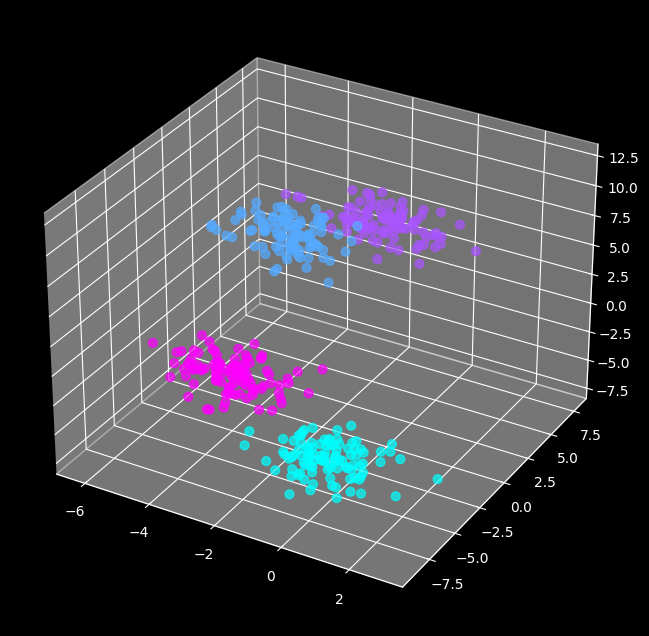

In [ ]:
ax = plt.axes(projection = '3d')
ax.scatter(x_[:,0], x_[:,1], x_[:,2], c = y_, s =40, alpha = 0.7, cmap ='cool')

# Modelo 3D

In [ ]:
modelo_3D = NnModel(x_, y_, hidden_neurons=10, output_neurons=output_neurons)     # criando o modelo
resultado_3D = modelo_3D.fit(40, 0.001)                                               #treino

Epoch: [4] / 40  Accuracy: 0.993  Loss: 0.001540
Epoch: [8] / 40  Accuracy: 1.000  Loss: 0.000898
Epoch: [12] / 40  Accuracy: 1.000  Loss: 0.000581
Epoch: [16] / 40  Accuracy: 1.000  Loss: 0.000428
Epoch: [20] / 40  Accuracy: 1.000  Loss: 0.000343
Epoch: [24] / 40  Accuracy: 1.000  Loss: 0.000288
Epoch: [28] / 40  Accuracy: 1.000  Loss: 0.000250
Epoch: [32] / 40  Accuracy: 1.000  Loss: 0.000221
Epoch: [36] / 40  Accuracy: 1.000  Loss: 0.000199
Epoch: [40] / 40  Accuracy: 1.000  Loss: 0.000182


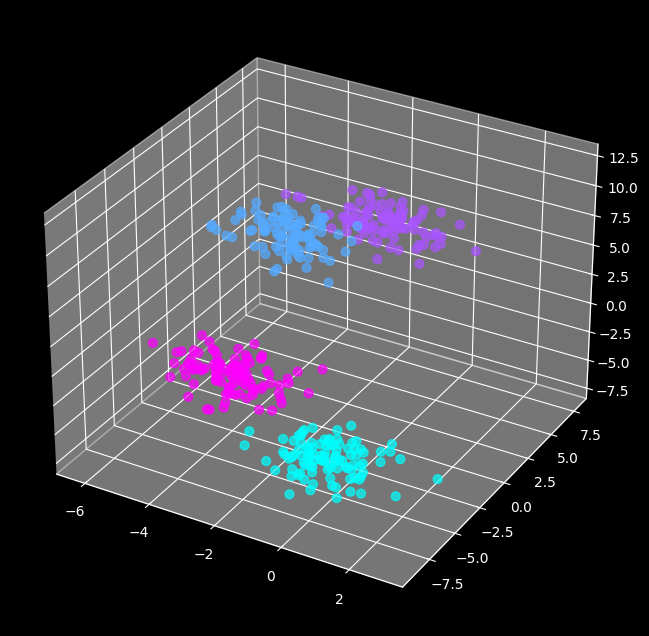

In [ ]:
ax = plt.axes(projection = '3d')
ax.scatter(x_[:,0], x_[:,1], x_[:,2], c = resultado_3D, s =40, alpha = 0.7, cmap ='cool')